# Molecular Biology (Splice-junction Gene Sequences)

## Team Name : @Raven
## Analysing the data

## please look for attached report.html file for VIsual plot and data understanding.

# Installing the required library>

In [1]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 17.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=338b2b4a23acff6969d85364cee5170cd7e2f001b1297642c05e830ef092f321
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [2]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 3.9 MB/s eta 0:00:00


# Library Importing

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

import sklearn.metrics as m
from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA



import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.layers import Dropout


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc

import numpy as np


from keras.utils import to_categorical

import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.frame import H2OFrame

import ydata_profiling as yp

from ydata_profiling import ProfileReport

from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score


from sklearn.preprocessing import label_binarize






import warnings
warnings.filterwarnings("ignore")

## importing the dataset from notion

In [4]:
#Install the ucimlrepo package
!pip install ucimlrepo

#Import the dataset into your code
from ucimlrepo import fetch_ucirepo

# fetch dataset
molecular_biology_splice_junction_gene_sequences = fetch_ucirepo(id=69)

# data (as pandas dataframes)
X = molecular_biology_splice_junction_gene_sequences.data.features
y = molecular_biology_splice_junction_gene_sequences.data.targets

# metadata
print(molecular_biology_splice_junction_gene_sequences.metadata)

# variable information
print(molecular_biology_splice_junction_gene_sequences.variables)

{'uci_id': 69, 'name': 'Molecular Biology (Splice-junction Gene Sequences)', 'repository_url': 'https://archive.ics.uci.edu/dataset/69/molecular+biology+splice+junction+gene+sequences', 'data_url': 'https://archive.ics.uci.edu/static/public/69/data.csv', 'abstract': 'Primate splice-junction gene sequences (DNA) with associated imperfect domain theory', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Sequential', 'Domain-Theory'], 'num_instances': 3190, 'num_features': 60, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': ['instancename'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5M888', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Problem Description: \r\n      \r\nSplice junctions are points on a DNA sequence at which `superfluous\' DNA is removed during the process of protein creation in

## Combining the dataset

In [5]:

# Combine features and target into a DataFrame
feature_names = molecular_biology_splice_junction_gene_sequences.data.feature_names
df = pd.DataFrame(data=X, columns=feature_names)
df['Target'] = y

# Print the first few rows of the DataFrame
print(df.head())


  Base1 Base2 Base3 Base4 Base5 Base6 Base7 Base8 Base9 Base10  ... Base52  \
0     C     C     A     G     C     T     G     C     A      T  ...      G   
1     A     G     A     C     C     C     G     C     C      G  ...      T   
2     G     A     G     G     T     G     A     A     G      G  ...      A   
3     G     G     G     C     T     G     C     G     T      T  ...      G   
4     G     C     T     C     A     G     C     C     C      C  ...      C   

  Base53 Base54 Base55 Base56 Base57 Base58 Base59 Base60 Target  
0      C      C      A      G      T      C      T      G     EI  
1      G      C      C      C      C      C      G      C     EI  
2      C      G      G      G      G      A      T      G     EI  
3      T      T      T      T      C      C      C      C     EI  
4      T      T      G      A      C      C      C      T     EI  

[5 rows x 61 columns]


## Viewing Dataset

In [6]:
df.head()

,Base1,Base2,Base3,Base4,Base5,Base6,Base7,Base8,Base9,Base10,...,Base52,Base53,Base54,Base55,Base56,Base57,Base58,Base59,Base60,Target
0,C,C,A,G,C,T,G,C,A,T,...,G,C,C,A,G,T,C,T,G,EI
1,A,G,A,C,C,C,G,C,C,G,...,T,G,C,C,C,C,C,G,C,EI
2,G,A,G,G,T,G,A,A,G,G,...,A,C,G,G,G,G,A,T,G,EI
3,G,G,G,C,T,G,C,G,T,T,...,G,T,T,T,T,C,C,C,C,EI
4,G,C,T,C,A,G,C,C,C,C,...,C,T,T,G,A,C,C,C,T,EI


## Viewing the no. of object data type in df

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3190 entries, 0 to 3189
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Base1   3190 non-null   object
 1   Base2   3190 non-null   object
 2   Base3   3190 non-null   object
 3   Base4   3190 non-null   object
 4   Base5   3190 non-null   object
 5   Base6   3190 non-null   object
 6   Base7   3190 non-null   object
 7   Base8   3190 non-null   object
 8   Base9   3190 non-null   object
 9   Base10  3190 non-null   object
 10  Base11  3190 non-null   object
 11  Base12  3190 non-null   object
 12  Base13  3190 non-null   object
 13  Base14  3190 non-null   object
 14  Base15  3190 non-null   object
 15  Base16  3190 non-null   object
 16  Base17  3190 non-null   object
 17  Base18  3190 non-null   object
 18  Base19  3190 non-null   object
 19  Base20  3190 non-null   object
 20  Base21  3190 non-null   object
 21  Base22  3190 non-null   object
 22  Base23  3190 non-null   

In [8]:
df.describe()

,Base1,Base2,Base3,Base4,Base5,Base6,Base7,Base8,Base9,Base10,...,Base52,Base53,Base54,Base55,Base56,Base57,Base58,Base59,Base60,Target
count,3190,3190,3190,3190,3190,3190,3190,3190,3190,3190,...,3190,3190,3190,3190,3190,3190,3190,3190,3190,3190
unique,5,5,4,4,4,4,4,4,4,4,...,5,5,5,5,5,5,5,5,5,3
top,G,C,C,C,C,C,C,C,C,T,...,G,G,G,G,G,G,C,C,G,N
freq,876,858,876,884,865,898,858,878,909,849,...,874,874,934,859,838,908,870,860,953,1655


In [9]:
df.reset_index(drop= True, inplace= True)

In [10]:
df.isna().sum().sum()

0

In [11]:
df.skew().sort_values(ascending=False)

Series([], dtype: float64)

# Viewing the category in the Target

In [12]:
df.Target.unique()

array(['EI', 'IE', 'N'], dtype=object)

## Counting the category

In [13]:
df['Target'].value_counts()

N     1655
IE     768
EI     767
Name: Target, dtype: int64

## profiling Report created for visual EDA

In [14]:

profile = ProfileReport(df, title="Profiling Report")
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Plot showing the variation in data

<Axes: >

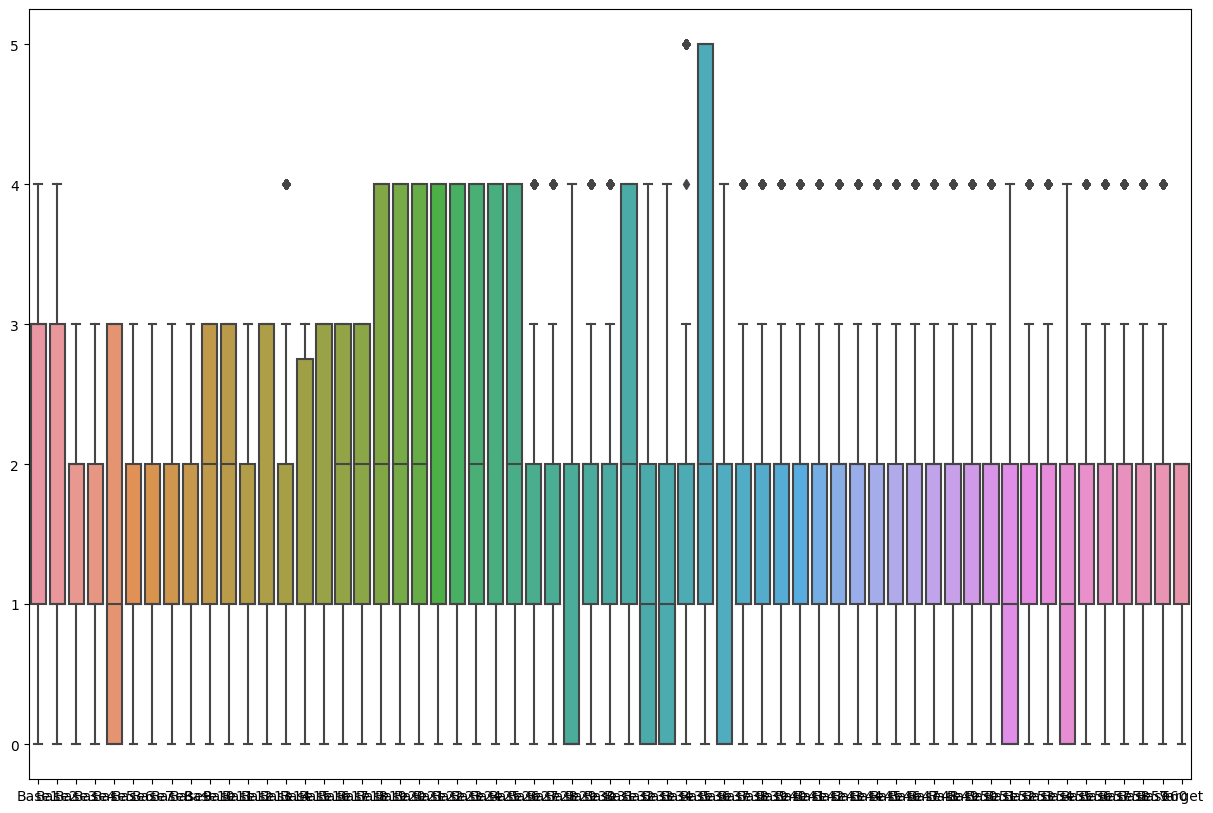

In [22]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

## Preprocessing the data

In [15]:
def preproc_data(df, train_sample: float, pca_dim=31):

    # Label encode
    categorical_cols = df.select_dtypes(include=['object']).columns

    # If there are categorical columns, encode them
    if len(categorical_cols) > 0:
        label_encoder = LabelEncoder()
        for col in categorical_cols:
            df[col] = label_encoder.fit_transform(df[col])

    # Train test split
    x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1],
                                                        df['Target'],
                                                        test_size=1-train_sample,
                                                        random_state=0)
    # Standard scaling
    ss = StandardScaler().fit(x_train)

    x_train = ss.transform(x_train)
    x_test = ss.transform(x_test)

    # PCA
    pca = PCA(n_components=0.99).fit(x_train)

    x_train = pca.transform(x_train)
    x_test = pca.transform(x_test)

    # Normalization
    norm = Normalizer().fit(x_train)

    x_train = norm.transform(x_train)
    x_test = norm.transform(x_test)

    # Reshaping
    y_train = y_train.values.reshape(-1,1)
    y_test = y_test.values.reshape(-1,1)

    return x_train, x_test, y_train, y_test

## data divided in 75/25 split

In [16]:
x_train, x_test, y_train, y_test = preproc_data(df, train_sample=0.75)# data - clean

# Intial Rate of model Accuracy with ML model

## Random Forest Clasifier used ,
with accuracy of 78% provided by model

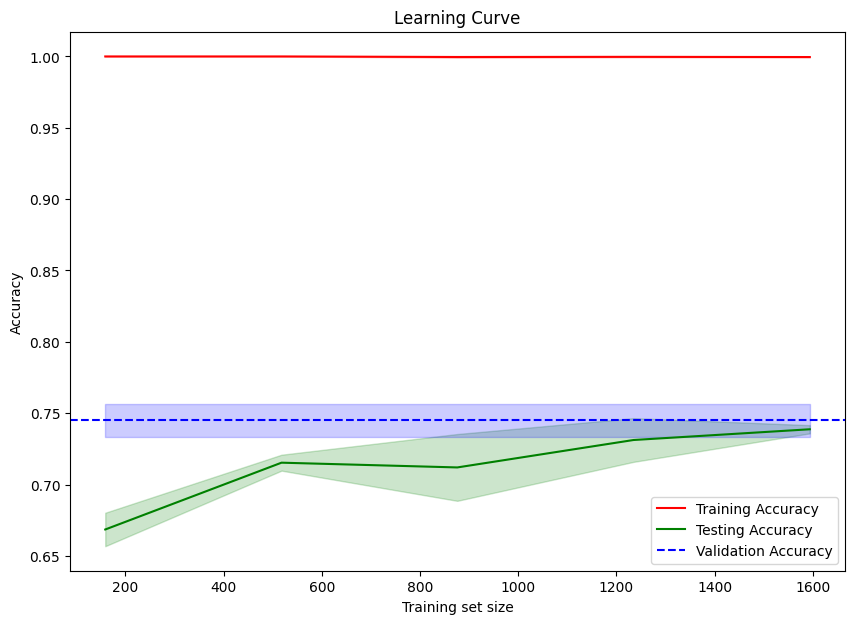

In [ ]:

classifier = RandomForestClassifier(random_state=42)
train_sizes, train_scores, test_scores = learning_curve(classifier, x_train, y_train, cv=3, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
color_palette = ['red', 'green', 'blue']

val_scores = cross_val_score(classifier, x_train, y_train, cv=3, n_jobs=-1)
val_mean = np.mean(val_scores)
val_std = np.std(val_scores)

plt.figure(figsize=(10, 7))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color=color_palette[0])
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color=color_palette[0])

plt.plot(train_sizes, test_mean, label="Testing Accuracy", color=color_palette[1])
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color=color_palette[1])

# Plotting vertical line for validation accuracy
plt.axhline(y=val_mean, color='blue', linestyle='--', label='Validation Accuracy')
plt.fill_between([train_sizes[0], train_sizes[-1]], [val_mean - val_std, val_mean - val_std],
                 [val_mean + val_std, val_mean + val_std], alpha=0.2, color='blue')

plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [ ]:
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy on test data:", accuracy)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Model accuracy on test data: 0.7844611528822055
Confusion Matrix:
[[117   4  80]
 [  2 132  66]
 [  4  16 377]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.58      0.72       201
           1       0.87      0.66      0.75       200
           2       0.72      0.95      0.82       397

    accuracy                           0.78       798
   macro avg       0.85      0.73      0.76       798
weighted avg       0.82      0.78      0.78       798



## H2O model used with random forest for classification,

MSE of 0.38 founded

In [ ]:

h2o.init()

h2o_x_train = H2OFrame(x_train)
h2o_y_train = H2OFrame(y_train.reshape(-1, 1))
h2o_x_test = H2OFrame(x_test)
h2o_y_test = H2OFrame(y_test.reshape(-1, 1))

train_data = h2o_x_train.cbind(h2o_y_train)
validation_data = h2o_x_test.cbind(h2o_y_test)

model = H2ORandomForestEstimator(ntrees=100, max_depth=20)

model.train(x=list(range(h2o_x_train.shape[1])), y=h2o_x_train.shape[1], training_frame=train_data, validation_frame=validation_data)

perf = model.model_performance(test_data=validation_data)
print(perf)

h2o.cluster().shutdown()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpb424iick
  JVM stdout: /tmp/tmpb424iick/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpb424iick/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 day
H2O_cluster_name:,H2O_from_python_unknownUser_adg7aj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
ModelMetricsRegression: drf
** Reported on test data. **

MSE: 0.3826243276667574
RMSE: 0.6185663486375228
MAE: 0.49536544758873163
RMSLE: 0.3477331266773689
Mean Residual Deviance: 0.3826243276667574
H2O session _sid_a140 closed.


# Initial ANN Model

A cusom ANN model with Y Design 2 input sector from sub model- 1,2 and output of moth in new dense layer then using adam optimizer to train model

loss: 7.0272e-04 - accuracy: 0.9996 - val_loss: 0.8852 - val_accuracy: 0.8684

In [ ]:


# Assuming you have x_train, y_train, x_test, y_test
unique_labels = len(np.unique(y_train))




y_train1_encoded = to_categorical(y_train, num_classes=unique_labels)


y_test_encoded = to_categorical(y_test, num_classes=unique_labels)





# Define the first sub-model
def sub_model1(inputs):
    x = Dense(128, activation='relu')(inputs)
    x = Dense(512, activation='relu')(x)
    x = Dense(1024, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    return x

# Define the second sub-model
def sub_model2(inputs):
    x = Dense(256, activation='relu')(inputs)
    x = Dense(1024, activation='relu')(x)
    x = Dense(2048, activation='relu')(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    return x


input_layer = Input(shape=(x_train.shape[1],))

sub_model1_output = sub_model1(input_layer)

sub_model2_output = sub_model2(input_layer)

concatenated_output = Concatenate()([sub_model1_output, sub_model2_output])
x = Dense(32, activation='relu')(concatenated_output)
output_layer = Dense(unique_labels, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
# model.fit(X_train2, y_train1, epochs=10, batch_size=32, validation_data=(x_test, y_test))
history = model.fit(x_train, y_train1_encoded, epochs=50, batch_size=128, validation_data=(x_test, y_test_encoded))



Epoch 1/50
19/19 [==============================] - 6s 159ms/step - loss: 0.8941 - accuracy: 0.5431 - val_loss: 0.6589 - val_accuracy: 0.6328
Epoch 2/50
19/19 [==============================] - 4s 237ms/step - loss: 0.5486 - accuracy: 0.7642 - val_loss: 0.4658 - val_accuracy: 0.8158
Epoch 3/50
19/19 [==============================] - 3s 142ms/step - loss: 0.3332 - accuracy: 0.8737 - val_loss: 0.4396 - val_accuracy: 0.8233
Epoch 4/50
19/19 [==============================] - 3s 143ms/step - loss: 0.2185 - accuracy: 0.9214 - val_loss: 0.4506 - val_accuracy: 0.8446
Epoch 5/50
19/19 [==============================] - 3s 137ms/step - loss: 0.1369 - accuracy: 0.9519 - val_loss: 0.4883 - val_accuracy: 0.8434
Epoch 6/50
19/19 [==============================] - 3s 139ms/step - loss: 0.1150 - accuracy: 0.9640 - val_loss: 0.4619 - val_accuracy: 0.8584
Epoch 7/50
19/19 [==============================] - 4s 193ms/step - loss: 0.0459 - accuracy: 0.9904 - val_loss: 0.5380 - val_accuracy: 0.8534
Epoch 

In [ ]:
# history = pd.DataFrame(history.history)
test_loss, test_accuracy = model.evaluate(x_test,  y_test_encoded)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

25/25 [==============================] - 0s 12ms/step - loss: 0.8852 - accuracy: 0.8684
Test Accuracy: 86.84%


In [ ]:
history = pd.DataFrame(history.history)

### Val Accuracy vs Accuracy

In [ ]:
x = px.line(data_frame= history , y= ["accuracy" , "val_accuracy"] ,markers = True )
x.update_xaxes(title="Number of Epochs")
x.update_yaxes(title = "Accuracy")
x.update_layout(showlegend = True,
    title = {
        'text': 'Accuracy vs Number of Epochs',
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
x.show()

### Val- loss vs loss

In [ ]:
x = px.line(data_frame= history ,
            y= ["loss" , "val_loss"] , markers = True )
x.update_xaxes(title="Number of Epochs")
x.update_yaxes(title = "Loss")
x.update_layout(showlegend = True,
    title = {
        'text': 'Loss vs Number of Epochs',
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
x.show()

### ROC curve

25/25 [==============================] - 1s 20ms/step


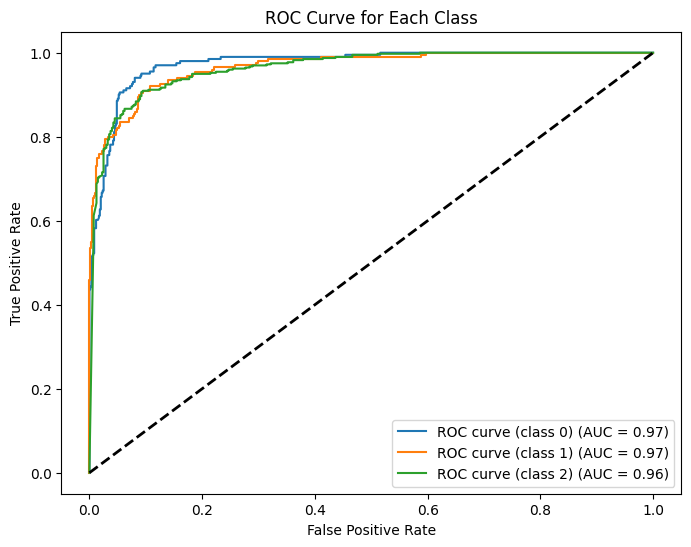

In [ ]:


y_pred_prob = model.predict(x_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(unique_labels):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(unique_labels):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()


# let's better the model

## Creating the complex voting classifier with input model logistic regression, SVM, Random Forest

Average Accuracy: 0.818551550038871
Ensemble Accuracy on Test Dataset: 0.8521303258145363

In [ ]:


svm_classifier = SVC(C=10, kernel='rbf', gamma='auto', probability=True)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
lr_classifier = LogisticRegression(random_state=42)


voting_classifier = VotingClassifier(estimators=[
    ('svm', svm_classifier),
    ('rf', rf_classifier),
    ('lr', lr_classifier)
], voting='soft')


k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(voting_classifier, x_train, y_train, cv=k_fold, scoring='accuracy')

print("Average Accuracy:", scores.mean())

voting_classifier.fit(x_train, y_train)

y_pred_ensemble = voting_classifier.predict(x_test)

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print("Ensemble Accuracy on Test Dataset:", accuracy_ensemble)


Average Accuracy: 0.818551550038871
Ensemble Accuracy on Test Dataset: 0.8521303258145363


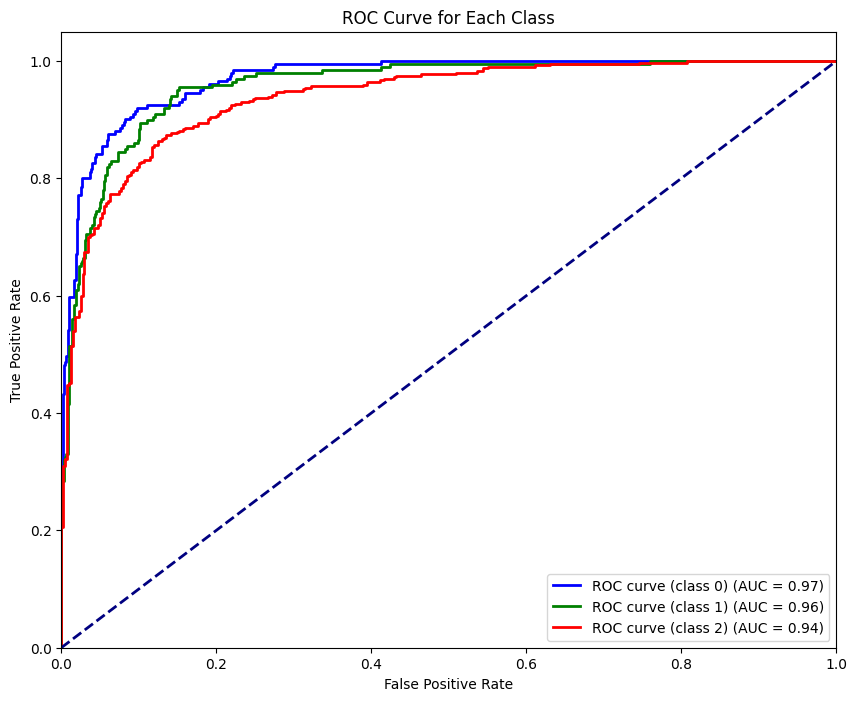

In [ ]:


y_test_binarized = label_binarize(y_test, classes=range(unique_labels))

y_pred_prob = voting_classifier.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(unique_labels):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red']

for i in range(unique_labels):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()


## H2o with cross validation,

MSE 0.35 for cv-4

In [ ]:


h2o.init()


h2o_x_train = H2OFrame(x_train)
h2o_y_train = H2OFrame(y_train.reshape(-1, 1))
h2o_x_test = H2OFrame(x_test)
h2o_y_test = H2OFrame(y_test.reshape(-1, 1))

train_data = h2o_x_train.cbind(h2o_y_train)
validation_data = h2o_x_test.cbind(h2o_y_test)

# Create an H2O random forest estimator with nfolds=5 for 5-fold cross-validation
model = H2ORandomForestEstimator(ntrees=100, max_depth=20, nfolds=5)

# Train the model
model.train(x=list(range(h2o_x_train.shape[1])), y=h2o_x_train.shape[1], training_frame=train_data, validation_frame=validation_data)

# Retrieve cross-validation metrics summary
cv_metrics = model.cross_validation_metrics_summary().as_data_frame()
print("Cross-Validation Metrics Summary:")
print(cv_metrics)


h2o.cluster().shutdown()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpkkdcr3ry
  JVM stdout: /tmp/tmpkkdcr3ry/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpkkdcr3ry/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 day
H2O_cluster_name:,H2O_from_python_unknownUser_3rzldq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Cross-Validation Metrics Summary:
                               mean        sd  cv_1_valid  cv_2_valid  \
0                     aic       NaN  0.000000         NaN         NaN   
1           loglikelihood       NaN  0.000000         NaN         NaN   
2                     mae  0.510577  0.013617    0.502544    0.523485   
3  mean_residual_deviance  0.384992  0.022916    0.374499    0.393836   
4                     mse  0.384992  0.022916    0.374499    0.393836   
5                      r2  0.432125  0.031040    0.41

## ANN model with DNA structure
oss: 0.0328 - accuracy: 0.9904 - val_loss: 0.5469 - val_accuracy: 0.8960


In [17]:

# Assuming you have x_train, y_train, x_test, y_test
unique_labels = len(np.unique(y_train))




y_train1_encoded = to_categorical(y_train, num_classes=unique_labels)


y_test_encoded = to_categorical(y_test, num_classes=unique_labels)



def sub_model1(inputs):
    x = Dense(256, activation='relu')(inputs)
    x = Dropout(0.3)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    return x

def sub_model2(inputs):
    x = Dense(256, activation='relu')(inputs)
    x = Dropout(0.3)(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(2048, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    return x

def sub_model3(inputs):
    x = Dense(64, activation='relu')(inputs)
    x = Dense(512, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    return x

def sub_model4(inputs):
    x = Dense(256, activation='relu')(inputs)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(2048, activation='relu')(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    return x

# Input layer
input_layer = Input(shape=(x_train.shape[1],))

# Define sub-models
sub_model1_output = sub_model1(input_layer)
sub_model2_output = sub_model2(input_layer)
concatenated_output = Concatenate()([sub_model1_output, sub_model2_output])
input_layer_1 = Dense(32, activation='relu')(concatenated_output)

sub_model3_output = sub_model3(input_layer_1)
sub_model4_output = sub_model4(input_layer_1)
concatenated_output_1 = Concatenate()([sub_model3_output, sub_model4_output])

# Additional dense layer
x = Dense(32, activation='relu')(concatenated_output_1)

# Output layer
output_layer = Dense(unique_labels, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
# model.fit(X_train2, y_train1, epochs=10, batch_size=32, validation_data=(x_test, y_test))
history = model.fit(x_train, y_train1_encoded, epochs=50, batch_size=128, validation_data=(x_test, y_test_encoded))


Epoch 1/50
19/19 [==============================] - 9s 248ms/step - loss: 1.0357 - accuracy: 0.5255 - val_loss: 0.9875 - val_accuracy: 0.4975
Epoch 2/50
19/19 [==============================] - 5s 291ms/step - loss: 0.8704 - accuracy: 0.5259 - val_loss: 0.8153 - val_accuracy: 0.5990
Epoch 3/50
19/19 [==============================] - 4s 228ms/step - loss: 0.7817 - accuracy: 0.6104 - val_loss: 0.8106 - val_accuracy: 0.5965
Epoch 4/50
19/19 [==============================] - 5s 254ms/step - loss: 0.7102 - accuracy: 0.6580 - val_loss: 0.6764 - val_accuracy: 0.7293
Epoch 5/50
19/19 [==============================] - 5s 255ms/step - loss: 0.5461 - accuracy: 0.7788 - val_loss: 0.4641 - val_accuracy: 0.8158
Epoch 6/50
19/19 [==============================] - 4s 224ms/step - loss: 0.3973 - accuracy: 0.8474 - val_loss: 0.4620 - val_accuracy: 0.8170
Epoch 7/50
19/19 [==============================] - 5s 292ms/step - loss: 0.3299 - accuracy: 0.8842 - val_loss: 0.3898 - val_accuracy: 0.8596
Epoch 

In [18]:
history = pd.DataFrame(history.history)

In [19]:
x = px.line(data_frame= history , y= ["accuracy" , "val_accuracy"] ,markers = True )
x.update_xaxes(title="Number of Epochs")
x.update_yaxes(title = "Accuracy")
x.update_layout(showlegend = True,
    title = {
        'text': 'Accuracy vs Number of Epochs',
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
x.show()

In [20]:
x = px.line(data_frame= history ,
            y= ["loss" , "val_loss"] , markers = True )
x.update_xaxes(title="Number of Epochs")
x.update_yaxes(title = "Loss")
x.update_layout(showlegend = True,
    title = {
        'text': 'Loss vs Number of Epochs',
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
x.show()

25/25 [==============================] - 1s 18ms/step


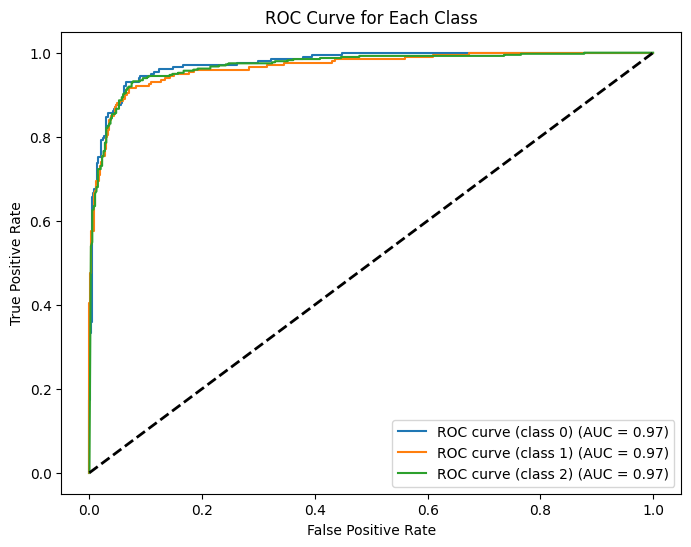

In [21]:



y_pred_prob = model.predict(x_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(unique_labels):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(unique_labels):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()

# Thank You!

As After going around with dataset we concluded that the there 34 high correlation set which effect the model highly like 23,40, 41 etc.


The variation in data is high causing the model prediction loss to high after some time. So, require more data for better model.

The data prdictibilty for target after optimization goes to,

accuracy: 0.9904 - val_accuracy: 0.8960